In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mytools

In [2]:
data = pd.read_csv('g:/mypy/帮忙/测试图查找100米的连续弱覆盖/1-基础数据/采样点电平.csv',encoding='gbk')

In [3]:
data_r = data.loc[data['SINR']<0]
data_h = data.loc[data['SINR']>=0]

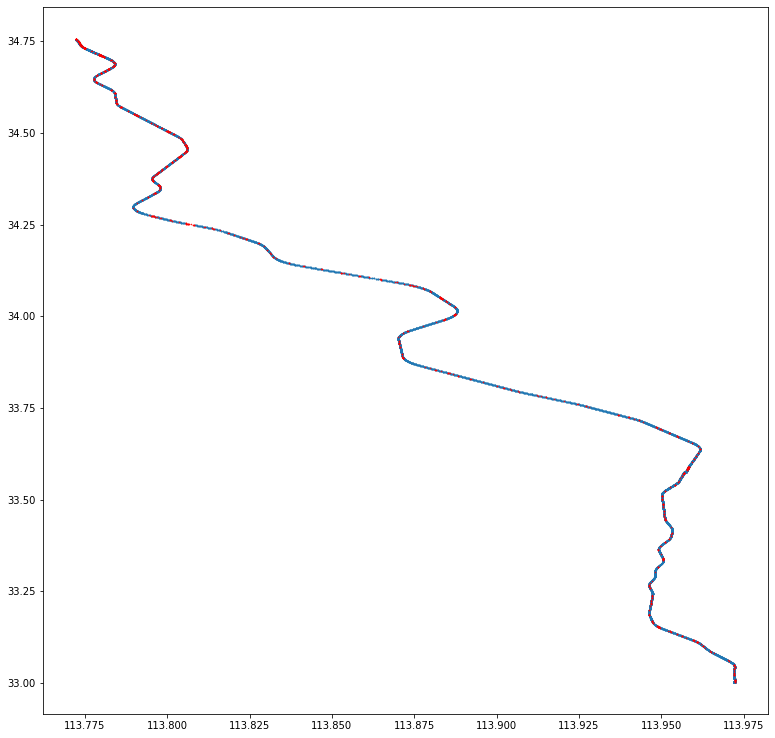

In [4]:
fig=plt.figure(figsize=(13,13))
plt.subplot(111)
plt.plot(data_h['Lon'], data_h['Lat'],'o',markersize=0.5)
plt.plot(data_r['Lon'], data_r['Lat'],'o',color='r',markersize=0.5)

plt.show()

In [5]:
data1 = data.sort_values('Lat',ascending=False)

In [6]:
dic_u = dict()
a=1
for id_u ,lon,lat in zip(data1['id'],data1['Lon'],data1['Lat']):
    point = Point(lon,lat)
    if a==1:
        dic_u[id_u]=0
        a=2
    else:
        juli2 = mytools.gisn.distancea_str(lon,lat,lon1,lat1)
        dic_u[id_u]=juli2
    id1 = id_u 
    lon1 = lon 
    lat1 = lat

In [7]:
data_jl = pd.DataFrame.from_dict(dic_u,orient='index',columns=['距离']).reset_index()

In [8]:
data_res = data1.merge(data_jl,how='left',left_on='id',right_on='index')

In [9]:
data_res.loc[(data_res['SINR']<0),'差点']=1

In [10]:
data_res2 = data_res[['id','距离','差点']]

In [11]:
data_res2 = data_res2.reset_index(drop=True)

In [12]:
distance = 100

In [31]:
obj=data_res2.head(0)
id_y = ''
obj_z = pd.DataFrame()
n=1
for index, row in data_res2.iterrows():
    obj.loc[index] = [row['id'],row['距离'],row['差点']]
    if obj['距离'].sum()>=distance:
        if obj['差点'].sum()>=obj.shape[0]*0.8:
            if id_y=='':
                id_o = obj.index.min()
                id_y = '1'
        elif id_y=='1':
            print( '{}到{}出现一次满足条件,最后的距离为{},总点为{}差点为{}.'.format(id_o,index,obj['距离'].sum(),obj.shape[0],obj['差点'].sum()))
            id_y = ''
            obj['问题序列'] = n
            n=n+1
            obj_z = obj_z.append(obj)
            obj = obj.drop(columns='问题序列').head(0)
        else:
            while obj['距离'].sum()>=distance:
                obj = obj.drop(index=obj.index.min())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


429到457出现一次满足条件,最后的距离为119.50284850061381,总点为29差点为23.0.
655到676出现一次满足条件,最后的距离为117.27858699300707,总点为22差点为17.0.
933到971出现一次满足条件,最后的距离为345.1629265456319,总点为39差点为31.0.
1001到1014出现一次满足条件,最后的距离为138.2210720471018,总点为14差点为11.0.
1242到1255出现一次满足条件,最后的距离为192.0245032449549,总点为14差点为11.0.
1319到1330出现一次满足条件,最后的距离为138.84294823084537,总点为12差点为9.0.
1331到1341出现一次满足条件,最后的距离为157.11257843767953,总点为11差点为8.0.
1373到1384出现一次满足条件,最后的距离为134.6840835008989,总点为12差点为9.0.
1416到1434出现一次满足条件,最后的距离为211.80546401181687,总点为19差点为15.0.
1610到1621出现一次满足条件,最后的距离为191.30786789654326,总点为12差点为9.0.
1809到1817出现一次满足条件,最后的距离为128.12673901203667,总点为9差点为7.0.
2002到2013出现一次满足条件,最后的距离为192.63469823886336,总点为12差点为9.0.
2068到2080出现一次满足条件,最后的距离为211.62885953305934,总点为13差点为10.0.
2220到2231出现一次满足条件,最后的距离为137.99561291875764,总点为12差点为9.0.
2424到2432出现一次满足条件,最后的距离为134.66577887222743,总点为9差点为7.0.
2533到2543出现一次满足条件,最后的距离为138.45475934911966,总点为11差点为8.0.
2690到2696出现一次满足条件,最后的距离为120.17058759166582,总点为7差点为5.0.
2810到2826出现一次满足条件,最后的距离为260.8773143640255,总点为17差点为13.0